In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
data = pd.read_csv("Logistic Regression Problem_ Data Set - advertising.csv")
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [3]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
data.tail()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
999,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [7]:
data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [8]:
data.shape

(1000, 10)

In [9]:
data.size

10000

In [10]:
data.nunique()

Daily Time Spent on Site     900
Age                           43
Area Income                 1000
Daily Internet Usage         966
Ad Topic Line               1000
City                         969
Male                           2
Country                      237
Timestamp                   1000
Clicked on Ad                  2
dtype: int64

In [11]:
data.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [12]:
data[["City"]]

,City
0,Wrightburgh
1,West Jodi
2,Davidton
3,West Terrifurt
4,South Manuel
...,...
995,Duffystad
996,New Darlene
997,South Jessica
998,West Steven


In [13]:
data.iloc[997]

Daily Time Spent on Site                           51.63
Age                                                   51
Area Income                                     42415.72
Daily Internet Usage                              120.37
Ad Topic Line               Expanded intangible solution
City                                       South Jessica
Male                                                   1
Country                                         Mongolia
Timestamp                            2016-02-01 17:24:57
Clicked on Ad                                          1
Name: 997, dtype: object

In [14]:
data[["Daily Time Spent on Site","Age","Daily Internet Usage","Male","Clicked on Ad"]]

,Daily Time Spent on Site,Age,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,256.09,0,0
1,80.23,31,193.77,1,0
2,69.47,26,236.50,0,0
3,74.15,29,245.89,1,0
4,68.37,35,225.58,0,0
...,...,...,...,...,...
995,72.97,30,208.58,1,1
996,51.30,45,134.42,1,1
997,51.63,51,120.37,1,1
998,55.55,19,187.95,0,0


In [15]:
data["Daily Internet Usage"].mean()

180.00010000000003

In [16]:
data["Daily Internet Usage"].sum()

180000.1

In [17]:
data["Daily Internet Usage"].max()

269.96

In [18]:
data["Daily Internet Usage"].min()

104.78

In [19]:
print('oldest person was of:', data['Age'].max(), 'Years')

oldest person was of: 61 Years


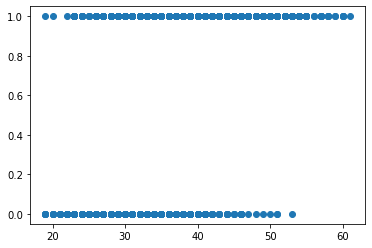

In [20]:
%matplotlib inline
plt.scatter(data.Age,data['Clicked on Ad'])


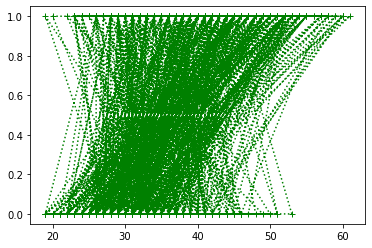

In [21]:

plt.plot(data.Age,data['Clicked on Ad'],'g+:')

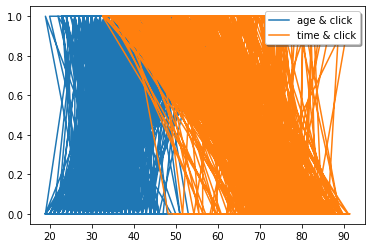

In [22]:
plt.plot(data.Age,data['Clicked on Ad'],label="age & click")
plt.plot(data['Daily Time Spent on Site'],data['Clicked on Ad'],label="time & click")
plt.legend(loc="upper right",shadow='True')

<BarContainer object of 1000 artists>

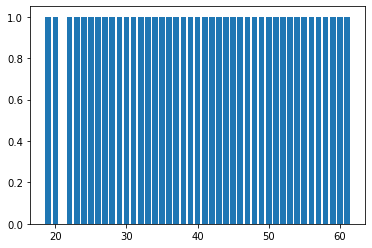

In [23]:
plt.bar(data.Age,data['Clicked on Ad'])


(array([500., 500.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

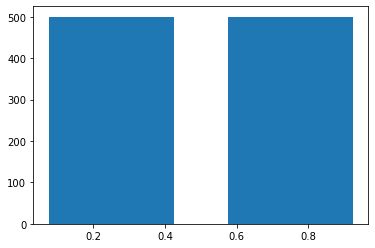

In [24]:
plt.hist(data['Clicked on Ad'],bins=2,rwidth=.7)

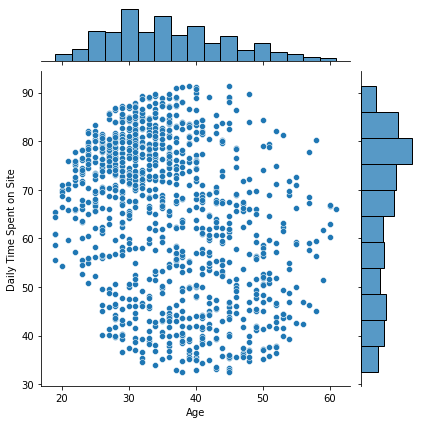

In [25]:
import seaborn as sns
sns.jointplot(x = "Age", y= "Daily Time Spent on Site", data = data)

<AxesSubplot:>

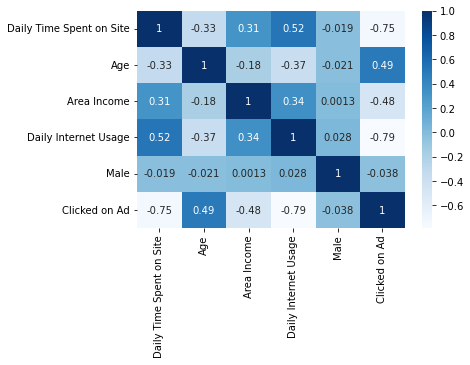

In [26]:
sns.heatmap(data.corr(), cmap='Blues', annot = True)

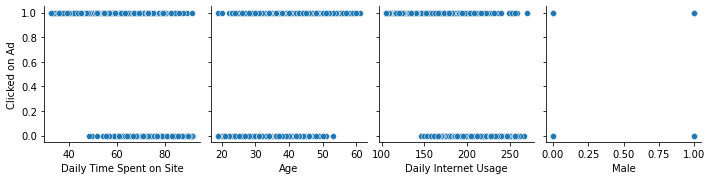

In [27]:
sns.pairplot(data, x_vars=['Daily Time Spent on Site', 'Age',
       'Daily Internet Usage', 'Male'],y_vars=['Clicked on Ad']);

In [28]:
data.groupby('Clicked on Ad')['Clicked on Ad', 'Daily Time Spent on Site', 'Age', 'Area Income', 
                            'Daily Internet Usage'].mean()

C:\Users\Leader\AppData\Local\Temp\ipykernel_2416\716530407.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Clicked on Ad')['Clicked on Ad', 'Daily Time Spent on Site', 'Age', 'Area Income',


,Clicked on Ad,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Clicked on Ad,,,,,
0,0.0,76.85462,31.684,61385.58642,214.51374
1,1.0,53.14578,40.334,48614.41374,145.48646


In [29]:
data.groupby(['Male','Clicked on Ad'])['Clicked on Ad'].count().unstack()

Clicked on Ad,0,1
Male,,
0,250,269
1,250,231


In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data[['Age']],data[['Clicked on Ad']],train_size=0.8)

In [31]:
x_test

,Age
435,42
640,45
745,50
809,43
956,36
...,...
425,42
606,26
380,30
669,33


In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [33]:
model.fit(x_train,y_train)


C:\Users\Leader\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [34]:
y_predict = model.predict(x_test)
y_predict

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1], dtype=int64)

In [35]:
model.predict_proba([[30]])

C:\Users\Leader\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.69501721, 0.30498279]])

In [36]:
model.predict_proba([[50]])

C:\Users\Leader\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.11175954, 0.88824046]])

In [37]:
 model.score(x_test,y_test)

0.715

# using multi variables

In [38]:
X = data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = data[['Clicked on Ad']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

In [39]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(670, 5) (670, 1)
(330, 5) (330, 1)


In [40]:
logreg = LogisticRegression()

model2 = logreg.fit(X_train,y_train)
model2

C:\Users\Leader\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [41]:
predictions = logreg.predict(X_test)

In [42]:
predictions[31]

1

In [43]:
predictions[55]

0

In [44]:
model2.score(X_test,y_test)

0.906060606060606

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)
cm

array([[156,   6],
       [ 25, 143]], dtype=int64)

Text(69.0, 0.5, 'Truth')

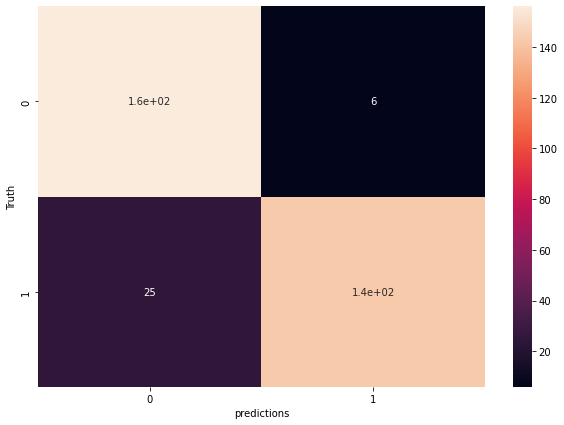

In [47]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('predictions')
plt.ylabel('Truth')

In [49]:
from sklearn.metrics import accuracy_score

ac = accuracy_score(y_test,predictions)
ac

0.906060606060606